## Notebook used to bin categorical features 

**Primarily:**
* Hospital_id

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

### Load the Dataset

In [37]:
df_raw = pd.read_csv('training_v2.csv')
df_raw.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [38]:
# Add a new column to the dataframe - # of deaths/ hospital id 
df_raw['deaths_per_hospital'] = df_raw.groupby(by='hospital_id')['hospital_death'].sum()
df_raw.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,deaths_per_hospital
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,78.0
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,1.0
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0.0


C:\Users\kmuss\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kmuss\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


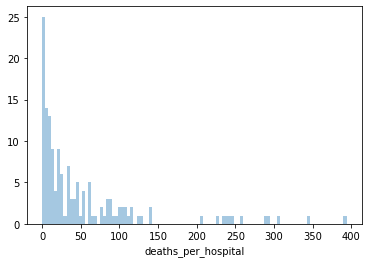

In [39]:
# Visualize distribution of data using different number of bins
sns.distplot(df_raw['deaths_per_hospital'], bins=100, kde=False)

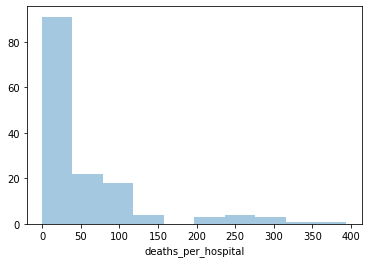

In [40]:
sns.distplot(df_raw['deaths_per_hospital'], bins=10, kde=False)

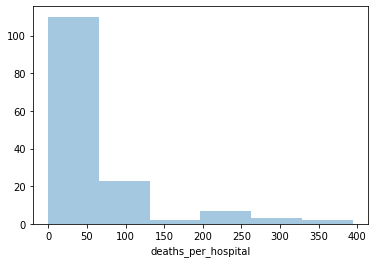

In [41]:
sns.distplot(df_raw['deaths_per_hospital'], bins=6, kde=False)

In [42]:
df_raw['deaths_per_hospital'].describe()

count    147.000000
mean      53.843537
std       76.155636
min        0.000000
25%        6.500000
50%       23.000000
75%       66.500000
max      394.000000
Name: deaths_per_hospital, dtype: float64

### Selecting 6 bins arbitrarily

In [24]:
# Calculate ranges of bins - if I use 6 bins
# 394/6 = 65.667

# Ranges should be: 
print(66*2)
print(66*3)
print(66*4)
print(66*5)
print(66*6)

132
198
264
330
396


In [43]:
# Create a column to store the bin category (1 of the 6)
bins = [0, 66, 132, 198, 264, 330, 396]
names = ['<66', '66-132', '132-198', '198-264', '264-330', '>330']

df_raw['HospDeathFreqBin'] = pd.cut(df_raw['deaths_per_hospital'], bins, labels=names)
df_raw.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,deaths_per_hospital,HospDeathFreqBin
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,NaN
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,NaN
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,78.0,66-132
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,1.0,<66
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0.0,NaN


In [44]:
# Check to see how many hospitals are in each bin (bins = how many deaths/hospital)
df_raw['HospDeathFreqBin'].value_counts()

<66        100
66-132      23
198-264      7
264-330      3
>330         2
132-198      2
Name: HospDeathFreqBin, dtype: int64

## Actually, aren't we trying to predict hospitals that have an unusually high rate of death compared to others?

**Rather than just having a high number of deaths because they have a high number of patients.** 

I'll look at the number of patients per hospital and calculating deaths per capita. 

In [45]:
# Add the frequency of patients for each hospital id as a column to the dataframe
df_raw['patients_per_hospital'] = df_raw.groupby(by='hospital_id')['patient_id'].count()
df_raw.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,deaths_per_hospital,HospDeathFreqBin,patients_per_hospital
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,NaN,NaN
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,NaN,NaN
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,78.0,66-132,1284.0
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,1.0,<66,16.0
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0.0,NaN,7.0


In [46]:
df_raw['patients_per_hospital'].value_counts()

127.0     2
50.0      2
34.0      2
108.0     2
15.0      2
6.0       2
10.0      2
611.0     2
7.0       2
546.0     1
673.0     1
12.0      1
799.0     1
272.0     1
157.0     1
220.0     1
542.0     1
4333.0    1
1081.0    1
944.0     1
1349.0    1
274.0     1
143.0     1
310.0     1
129.0     1
215.0     1
2730.0    1
19.0      1
2225.0    1
942.0     1
         ..
765.0     1
414.0     1
92.0      1
1402.0    1
284.0     1
22.0      1
1744.0    1
580.0     1
516.0     1
716.0     1
710.0     1
172.0     1
839.0     1
121.0     1
9.0       1
293.0     1
460.0     1
179.0     1
53.0      1
36.0      1
1442.0    1
271.0     1
978.0     1
213.0     1
450.0     1
3925.0    1
422.0     1
150.0     1
176.0     1
16.0      1
Name: patients_per_hospital, Length: 138, dtype: int64

In [47]:
df_raw['patients_per_hospital'].describe()

count     147.000000
mean      623.897959
std       778.766743
min         2.000000
25%       124.000000
50%       323.000000
75%       809.500000
max      4333.000000
Name: patients_per_hospital, dtype: float64

In [48]:
# Check the number of unique hospital ids in the dataset
df_raw['hospital_id'].nunique()

147

In [49]:
# Create new column - deaths per hospital capacity 
df_raw['hopsital_deaths_per_capita'] = df_raw['deaths_per_hospital']/df_raw['patients_per_hospital']
df_raw.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,deaths_per_hospital,HospDeathFreqBin,patients_per_hospital,hopsital_deaths_per_capita
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,NaN,NaN,NaN
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,NaN,NaN,NaN
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,Metabolic,Metabolic,78.0,66-132,1284.0,0.060748
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,1.0,<66,16.0,0.062500
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,Trauma,Trauma,0.0,NaN,7.0,0.000000


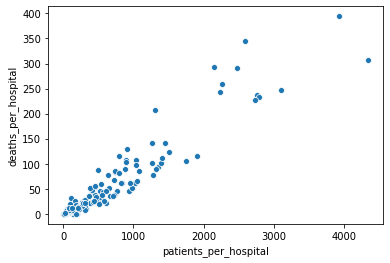

In [52]:
sns.scatterplot(x='patients_per_hospital', y = 'deaths_per_hospital', data=df_raw)

It looks like the number of patients per hospital and deaths per hospital are pretty strongly correlated - which is what we expect. 

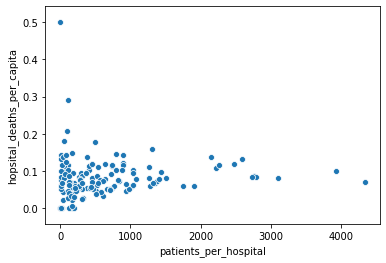

In [53]:
sns.scatterplot(x='patients_per_hospital', y = 'hopsital_deaths_per_capita', data=df_raw)

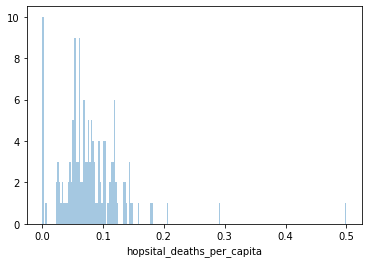

In [51]:
# Visualize distribution of data using different number of bins
sns.distplot(df_raw['hopsital_deaths_per_capita'], bins=200, kde=False)

It doesn't seem like there are too many hospitals with an unusually high rate of deaths/patients. Maybe we can bin this into 3 categories, in the normal range, slightly higher rates of death, and higher rates of death. 

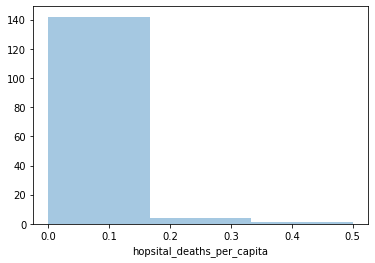

In [56]:
# Visualize distribution of data using different number of bins
sns.distplot(df_raw['hopsital_deaths_per_capita'], bins=3, kde=False)

In [57]:
df_raw['hopsital_deaths_per_capita'].describe()

count    147.000000
mean       0.079973
std        0.056002
min        0.000000
25%        0.052687
50%        0.072706
75%        0.102625
max        0.500000
Name: hopsital_deaths_per_capita, dtype: float64

In [58]:
# Create a column to store the bin category (1 of the 3)
bins = [0,.167, .334, .501]
names = ['low', 'medium', 'high']

df_raw['death_rate_per_capita'] = pd.cut(df_raw['hopsital_deaths_per_capita'], bins, labels=names)
df_raw.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,deaths_per_hospital,HospDeathFreqBin,patients_per_hospital,hopsital_deaths_per_capita,death_rate_per_capita
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,NaN,NaN,NaN,NaN
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,0.0,Respiratory,Respiratory,NaN,NaN,NaN,NaN,NaN
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,Metabolic,Metabolic,78.0,66-132,1284.0,0.060748,low
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,Cardiovascular,Cardiovascular,1.0,<66,16.0,0.062500,low
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,Trauma,Trauma,0.0,NaN,7.0,0.000000,NaN


In [59]:
with open('df_hospital_bins.pickle','wb') as to_write:
    pickle.dump(df_raw,to_write)